In [51]:
import numpy as np
import matplotlib.colors as clrs
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import chi2
import math

In [52]:

n1 = 1
n2 = 1.58

#Kuhlmann_RSI_2013 objective lens
f=.0031
NA = 0.68
rho_max = f * NA # = 0.002108

In [53]:
def normalize_meshgrid(meshgrid, min_val=0, max_val=1):
    # Calcola il minimo e il massimo della meshgrid
    data_min = meshgrid.min()
    data_max = meshgrid.max()
    
    # Evita divisioni per zero
    if data_max - data_min == 0:
        return np.full_like(meshgrid, (min_val + max_val) / 2)
    
    # Normalizza nell'intervallo [0, 1] e scala a [min_val, max_val]
    normalized = (meshgrid - data_min) / (data_max - data_min)  # [0, 1]
    scaled = normalized * (max_val - min_val) + min_val  # [min_val, max_val]
    return scaled

In [54]:
def _rp(_rho):
    
    theta_i = np.arcsin(_rho/f)

    # seno angolo trasmesso usando la legge di Snell
    sin_theta_t = n1 / n2 * np.sin(theta_i)
    
    # Evita valori fuori dal dominio [-1, 1] a causa di errori numerici
    sin_theta_t = np.clip(sin_theta_t, -1, 1)
    
    #coseno angolo trasmesso
    cos_theta_t = np.sqrt(1 - sin_theta_t**2)
    
    # Calcola il coefficiente di Fresnel r_p
    numerator = n2 * np.cos(theta_i) - n1 * cos_theta_t
    denominator = n2 * np.cos(theta_i) + n1 * cos_theta_t
    rp = numerator / denominator
    
    return rp

def _rs(_rho):
    
    theta_i = np.arcsin(_rho/f)

    # seno angolo trasmesso usando la legge di Snell
    sin_theta_t = n1 / n2 * np.sin(theta_i)
    
    # Evita valori fuori dal dominio [-1, 1] a causa di errori numerici
    sin_theta_t = np.clip(sin_theta_t, -1, 1)
    
    #coseno angolo trasmesso
    cos_theta_t = np.sqrt(1 - sin_theta_t**2)
    
    # Calcola il coefficiente di Fresnel r_s
    numerator = n1 * np.cos(theta_i) - n2 * cos_theta_t
    denominator = n1 * np.cos(theta_i) + n2 * cos_theta_t
    rs = numerator / denominator
    
    return rs

# Parametri
E0 = 1  # Ampiezza del campo incidente

_rho = np.linspace(0, rho_max, 500)  # Raggio
_phi = np.linspace(0, 2 * np.pi, 500)  # Angolo
rho, phi = np.meshgrid(_rho, _phi)  # Crea una griglia 2D

Ex = np.abs(- E0 * ( _rp(rho) * np.cos(phi)**2 - _rs(rho) * np.sin(phi)**2 ))
Ey = np.abs(- E0 * ( np.sin(phi) * np.cos(phi) * ( _rp(rho)+_rs(rho) ) ))

Ex = normalize_meshgrid(Ex)
Ey = normalize_meshgrid(Ey)
# Conversione in coordinate cartesiane per il plot
x = np.array(rho * np.cos(phi))
y = np.array(rho * np.sin(phi))

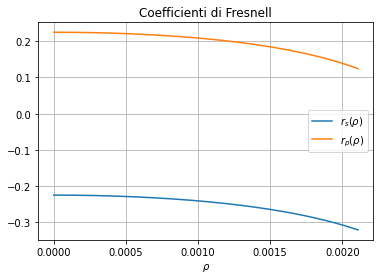

In [55]:
plt.title('Coefficienti di Fresnell')
plt.plot(_rho, _rs(_rho), label=r'$r_s(\rho)$')
plt.plot(_rho, _rp(_rho), label=r'$r_p(\rho)$')
plt.xlabel(r'$\rho$')
plt.legend()
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  This is separate from the ipykernel package so we can avoid doing imports until


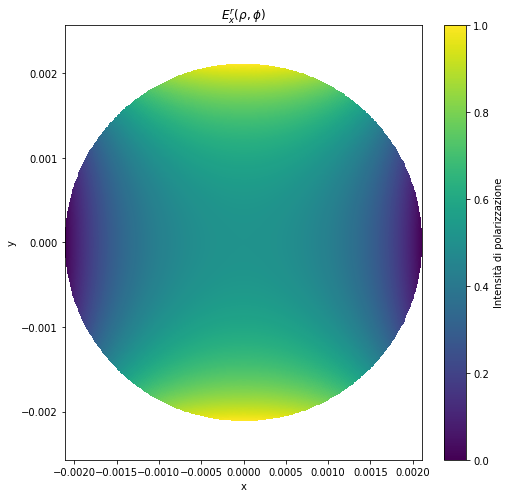

In [56]:
# Creazione del plot
plt.figure(figsize=(8,8))
plt.pcolormesh(x, y, Ex)
plt.colorbar(label="Intensità di polarizzazione")  
plt.title(r'$E_x^r(\rho,\phi)$')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal') 
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  


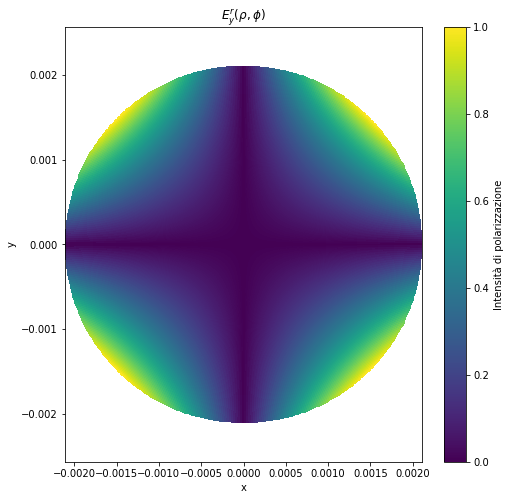

In [57]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(x, y, Ey) 
plt.colorbar(label="Intensità di polarizzazione")  
plt.title(r'$E_y^r(\rho,\phi)$')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal') 
plt.show()